In [1]:
import pandas as pd 
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats
from mpl_toolkits.mplot3d import Axes3D


In [6]:
#"C:\\Users\\f002tj9\\Documents\\Research\\kj\\TubeFile2020\\virat4_tubelistv0.csv"

tubefile = "C:\\Users\\Khari Jarrett\\Documents\\Tubes\\TubeFile2020\\virat8_tubelistv0.csv"

def readTubes(tubefile):
    # This function reads in a CSV and converts the tube data into a numpy array (and dataframe). 
    # Each row is a tube slice with the properties [x,y,a,b,rot,f.Vx,Vy,tubenum]
    
    print("Reading from:", tubefile)

    data = pd.read_csv(tubefile)
    #Saving all of the stuff into np arrays (vectors)

    X = np.asarray(data['x'])
    Y = np.asarray(data['y'])
    A = np.asarray(data['a'])
    B = np.asarray(data['b'])
    ROT = np.asarray(data['rot'])
    F = np.asarray(data['f'])
    VX = np.asarray(data['Vx'])
    VY = np.asarray(data['Vy'])
    TNUM = np.asarray(data['tubenum'])
    RR = np.asarray(data['R'])
    GG = np.asarray(data['G'])
    BB = np.asarray(data['B'])
    
    tubeMtx = np.transpose(np.asarray([X,Y,A,B,ROT,F,VX,VY,RR,GG,BB,TNUM]))
    
    print("We have",len(TNUM) ,"tube slices and ", max(TNUM)+1, "tubes.")
    
    return tubeMtx, data


def getTube(tubeData, tubeNum):
    
    T = np.array([tubeData[i,:] for i in range(len(tubeData)) if DATA[i,-1] ==tubeNum])
    return T


def showTubes(listOfTubes=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel("frames")
    
    if (listOfTubes==None):
        for t in range(numTubes):
            T = getTube(DATA,t)
            f = T[:,5]
            x = T[:,0]
            y = T[:,1]
            ax.scatter(f,x,y)
    else:
        for t in range(numTubes):
            if t in listOfTubes:
                T = getTube(DATA,t)
                f = T[:,5]
                x = T[:,0]
                y = T[:,1]
                ax.scatter(f,x,y)
    plt.show()
    
def saveTubesCSV(CSVloc, tubesToKeep):
    Tmat = []
    for t in tubesToKeep:
        Tmat.extend(getTube(DATA,t))

    Tmtx=np.asarray(Tmat)

    df = {'x':Tmtx[:,0], 'y':Tmtx[:,1],'a':Tmtx[:,2],'b':Tmtx[:,3],'rot':Tmtx[:,4],'f':Tmtx[:,5],
          'Vx':Tmtx[:,6],'Vy':Tmtx[:,7],'R':Tmtx[:,8] ,'G':Tmtx[:,9],'B':Tmtx[:,10],'tubenum':Tmtx[:,11]}
    DF = pd.DataFrame(df)
    DF.to_csv(CSVloc)


In [7]:

DATA, df_data = readTubes(tubefile)
T = getTube(DATA, 4)
numTubes = int(DATA[-1,-1]) + 1

tubeStats = [] #Jump factor and length (2)


for t in range(numTubes):
    deltaD = 0
    i=0
    T = getTube(DATA,t)
    
    #Calculate "jumpiness"
    while(i+1 < T.shape[0]):
        deltaD += math.sqrt((T[i+1,0] - T[i,0])**2 + (T[i+1,1] - T[i,1])**2 )
        i+=1
    jumpiness = deltaD/T.shape[0]
    
    tubeStats.append((t, jumpiness , T.shape[0]))
    print("Tube",t,"has length",tubeStats[t][2],"and jumpiness =",tubeStats[t][1])



Reading from: C:\Users\Khari Jarrett\Documents\Tubes\TubeFile2020\virat8_tubelistv0.csv
We have 3560 tube slices and  28 tubes.
Tube 0 has length 173 and jumpiness = 1.5578368615013054
Tube 1 has length 438 and jumpiness = 4.259110282589414
Tube 2 has length 10 and jumpiness = 13.691094570181841
Tube 3 has length 17 and jumpiness = 3.278646733561469
Tube 4 has length 18 and jumpiness = 18.537436529158104
Tube 5 has length 23 and jumpiness = 11.295606115985201
Tube 6 has length 208 and jumpiness = 34.25640374925203
Tube 7 has length 30 and jumpiness = 13.558745058095715
Tube 8 has length 13 and jumpiness = 7.301257180258495
Tube 9 has length 21 and jumpiness = 1.6394040949674211
Tube 10 has length 42 and jumpiness = 37.677594277841685
Tube 11 has length 27 and jumpiness = 9.203722897799386
Tube 12 has length 10 and jumpiness = 7.56784695105258
Tube 13 has length 24 and jumpiness = 8.190403575289604
Tube 14 has length 18 and jumpiness = 12.514939162977175
Tube 15 has length 279 and jumpi

In [128]:
print(tubeStats)

[(0, 0.0, 10), (1, 0.7656574268514571, 206), (2, 0.6128138091509543, 431), (3, 0.8720998345769612, 431), (4, 0.5289960771231533, 64), (5, 1.4401729319235248, 431), (6, 4.458282874847177, 431), (7, 0.7488461767129251, 67), (8, 0.8351707474036472, 174)]


H: [23, 0, 1, 25]
L: [15, 16]
BYE [19, 17, 6, 26, 10, 27, 22, 24, 9, 3, 20, 8, 12, 13, 11, 21, 5, 14, 7, 2, 4, 18, 10]
20.895057090552232


<IPython.core.display.Javascript object>


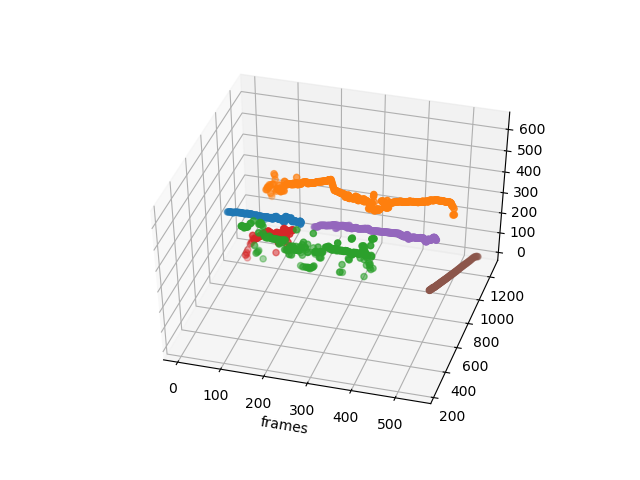

<IPython.core.display.Javascript object>


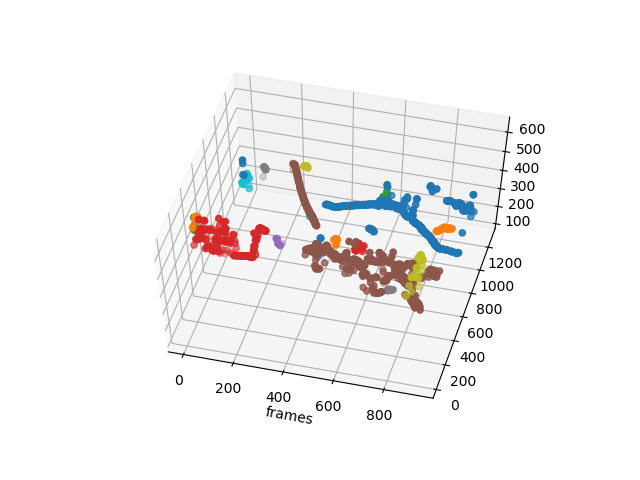

<IPython.core.display.Javascript object>


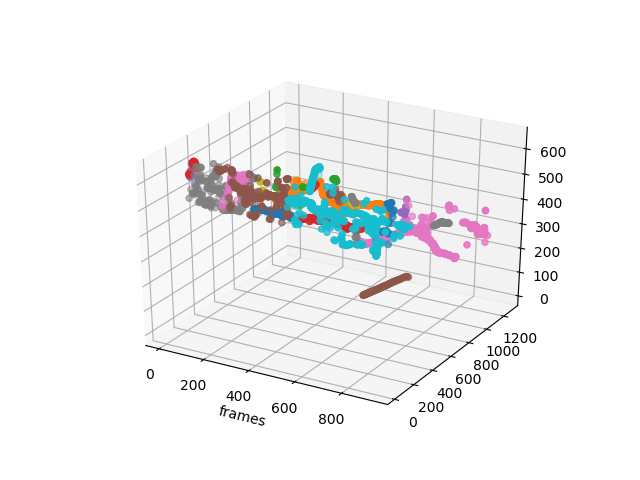

In [8]:
#DO SOMETHING TO ADD TUBENUMS TO JUMPYLIST (FOR DELETION)
#A: SPLIT INTO THREE(FIVE?) GROUPS AND TAKE MOST JUMPY
#B: CHECK AVG AND TAKE ANYTHING ABOVE 2 ST DEVS AWAY
#C: 


jumpyList = []

# Populate jumpiness array
J = np.zeros(numTubes)
for t in range(numTubes):
    J[t] = tubeStats[t][1]

'''
#METHOD A. Take the most jumpy 5th and delete them
tubeStats.sort(key = lambda x: x[1])  
k = round(numTubes *0.2)
print(tubeStats)
for i in range(k):
    jumpyList.append(tubeStats[-(i+1)][0])  
print()
print(jumpyList)


#-----------------------------------------------------------------
#METHOD B. Delete > 2 st. devs away from mean jumpiness
J = np.zeros(numTubes)
for t in range(numTubes):
    J[t] = tubeStats[t][1]
cutoff = 2*np.std(J) + np.mean(J)
print(J)
print("IQR=", scipy.stats.iqr(J))
print("Mean=", np.mean(J))


jumpyList = [tup[0] for tup in tubeStats if tup[1] > cutoff]
'''
#-----------------------------------------------------------------
#METHOD C. Above the median-> high tier. <2 seconds -> del
highList = []
lowList = []
tubeStats.sort(key = lambda x: x[1]) 
cutoff = tubeStats[-round(numTubes *0.2)][1]

highList.extend([tup[0] for tup in tubeStats if ((tup[1]<np.median(J)) and (tup[2]>60)) ])
jumpyList.extend([tup[0] for tup in tubeStats if  ((tup[1]>cutoff) and (tup[1]>10)) ])
jumpyList.extend([tup[0] for tup in tubeStats if (tup[2]<60) ])
lowList.extend(t for t in range(numTubes) if t not in jumpyList and t not in highList)

#lowList.extend([tup[0] for tup in tubeStats if ((tup[0] not in highList) and (tup[2]>60)) ])
#jumpyList.extend(t for t in range(numTubes) if t not in lowList and t not in highList)


print("H:", highList)
print("L:", lowList)
print("BYE", jumpyList)
print(cutoff)

%matplotlib notebook
notjumpyList = [t for t in range(numTubes+1) if t not in jumpyList]

showTubes(highList+lowList)
showTubes(jumpyList)
showTubes()



In [5]:


outCSV = "C:\\Users\\Khari Jarrett\\Documents\\Tubes\\TubeFile2020\\virat8_tubelistv4.csv"
saveTubesCSV(outCSV,(highList+lowList))

<IPython.core.display.Javascript object>


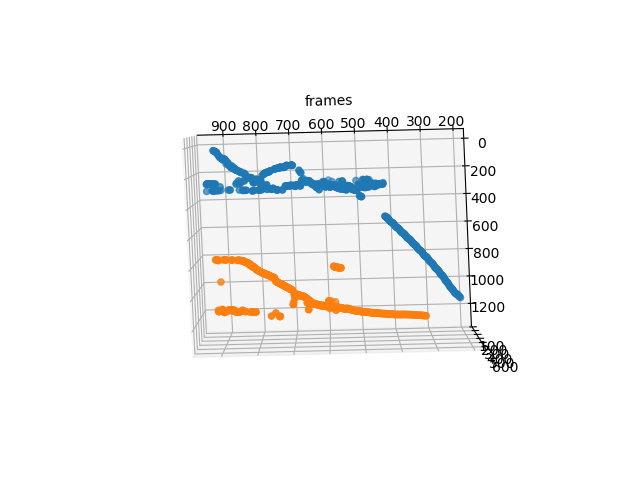

In [9]:
showTubes([19,26])

In [101]:
#showTubes([2])
tubeStats[-round(numTubes *0.2)][1]

33.11342943842045